The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[[-20 -20 -20 -20 -20]
  [-10 -10 -10 -10 -10]
  [  0   0   0   0   0]
  [ 10  10  10  10  10]
  [ 20  20  20  20  20]]

 [[-20 -20 -20 -20 -20]
  [-10 -10 -10 -10 -10]
  [  0   0   0   0   0]
  [ 10  10  10  10  10]
  [ 20  20  20  20  20]]

 [[-20 -20 -20 -20 -20]
  [-10 -10 -10 -10 -10]
  [  0   0   0   0   0]
  [ 10  10  10  10  10]
  [ 20  20  20  20  20]]

 [[-20 -20 -20 -20 -20]
  [-10 -10 -10 -10 -10]
  [  0   0   0   0   0]
  [ 10  10  10  10  10]
  [ 20  20  20  20  20]]

 [[-20 -20 -20 -20 -20]
  [-10 -10 -10 -10 -10]
  [  0   0   0   0   0]
  [ 10  10  10  10  10]
  [ 20  20  20  20  20]]]


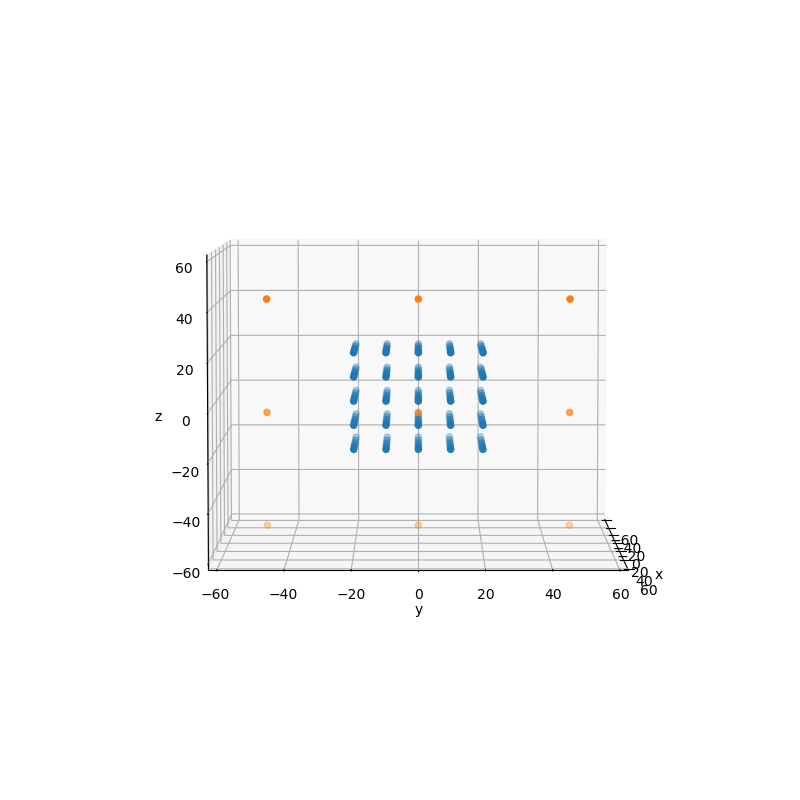

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from mpl_toolkits import mplot3d
import utility
import tracing
import numpy as np
import matplotlib.pyplot as plt

# Sample Settings
s_offset_x = 0
s_offset_y = 0
s_offset_z = 0
s_num_x = 5
s_num_y = 5
s_num_z = 5
s_gap = 10

# Camera Settings
c_offset_x = 60
c_offset_y = 0
c_offset_z = 0
c_num_x = 1
c_num_y = 3
c_num_z = 3
c_gap = 45

  
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
  
# Data for a three-dimensional line
# Sample
xl,yl,zl = utility.generate_points_array(s_offset_x,s_offset_y,s_offset_z,s_num_x,s_num_y,s_num_z,s_gap)
ax.scatter3D(xl, yl, zl)
print(xl)

# Camera
xv,yv,zv = utility.generate_points_array(c_offset_x,c_offset_y,c_offset_z,c_num_x,c_num_y,c_num_z,c_gap)
ax.scatter3D(xv, yv, zv, 'green')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set(scaled = 'equal')
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_zlim(-60,60)
#ax.set(xlim=(-40,40),ylim=(-40,40),zlim=(-40,40),option='equal')
plt.autoscale(enable=False, axis='both', tight=None)
ax.dist = 100

delta_az, delta_el = utility.get_angles(60,0,5)
  
ax.view_init(delta_el,delta_az)
  
plt.show()

Using matplotlib backend: module://ipympl.backend_nbagg
[[[-45 -45 -45]]

 [[  0   0   0]]

 [[ 45  45  45]]]


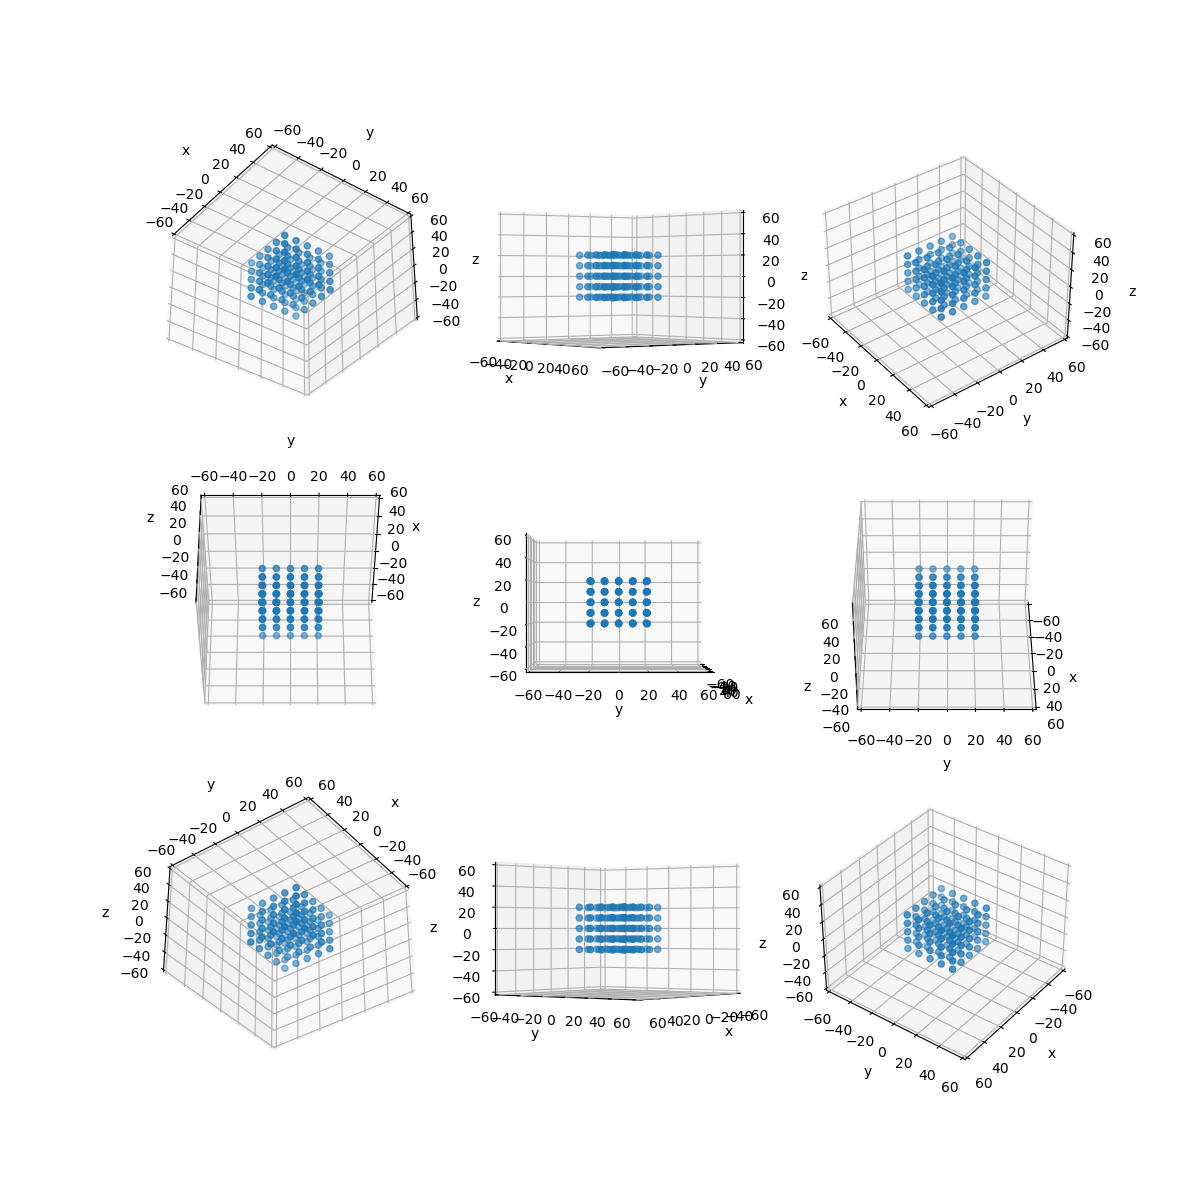

In [8]:
%matplotlib auto 
print(yv)
fig = plt.figure(figsize = (12, 12))
subidx = 1
for i in range(c_num_y*c_num_z):
    ax = fig.add_subplot(c_num_y,c_num_z,subidx,projection='3d')
    subidx += 1
    ax.set_xlim(-60,60)
    ax.set_ylim(-60,60)
    ax.set_zlim(-60,60)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter3D(xl, yl, zl)
    delta_az, delta_el = utility.get_angles(c_offset_x,yv.ravel()[i],zv.ravel()[i])
    ax.view_init(delta_el,delta_az)
        


In [11]:
sample_list = []

xl = xl.ravel()
yl = yl.ravel()
zl = zl.ravel()
for i in range (len(xl)):
    sample = np.array([xl[i],yl[i],zl[i]])
    sample_list.append(sample)

camera_list = []

xv = xv.ravel()
yv = yv.ravel()
zv = zv.ravel()
for i in range (len(xv)):
    camera = np.array([xv[i],yv[i],zv[i]])
    camera_list.append(camera)

In [32]:
camera_hits = tracing.get_visiable_percentage(sample_list,camera_list,1)
#print(camera_hits)

In [33]:
for i in range(len(camera_hits)):
    for j in range(len(camera_hits[i])):
        print(len(camera_hits[i][j]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
2
1
2
1
1
1
3
2
2
2
3
3
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
